In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset\city_day.csv
Dataset\city_hour.csv
Dataset\stations.csv
Dataset\station_day.csv
Dataset\station_hour.csv


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

In [ ]:
df=pd.read_csv('Dataset/city_day.csv',parse_dates=['Date'])
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
missing_values=pd.DataFrame(df.isna().sum()/len(df))
missing_values.columns=['Proportion']
missing_values=missing_values.sort_values(by='Proportion',ascending=False)
missing_values.style.background_gradient(cmap='Blues')

,Proportion
Xylene,0.613220
PM10,0.377231
NH3,0.349734
Toluene,0.272290
Benzene,0.190410
AQI,0.158511
AQI_Bucket,0.158511
PM2.5,0.155701
NOx,0.141715
O3,0.136196


In [ ]:
rcParams['axes.spines.top']=False
rcParams['axes.spines.right']=False


rcParams['figure.dpi']=300

rcParams['figure.autolayout']=True

rcParams['font.style']='normal'
rcParams['font.size']=4

rcParams['lines.linewidth']=0.7


rcParams['xtick.labelsize']=4
rcParams['ytick.labelsize']=4

<AxesSubplot:xlabel='Xylene', ylabel='City'>

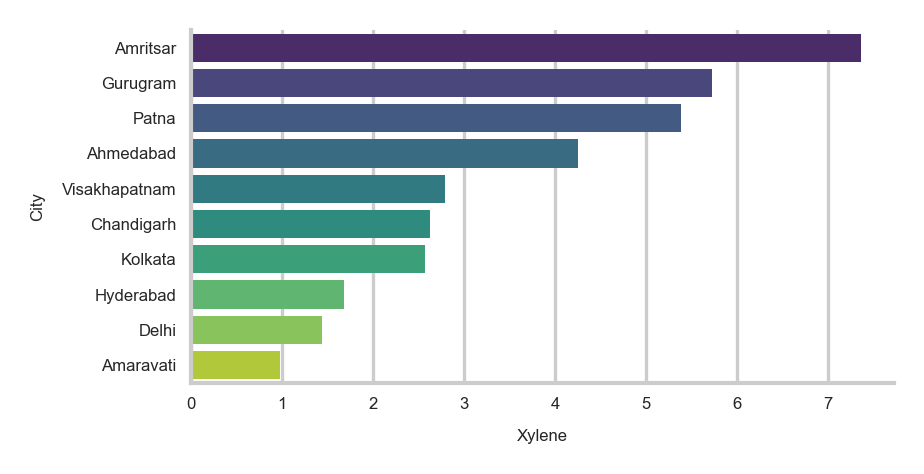

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['Xylene']].mean().sort_values(by='Xylene',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='Xylene',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='NO', ylabel='City'>

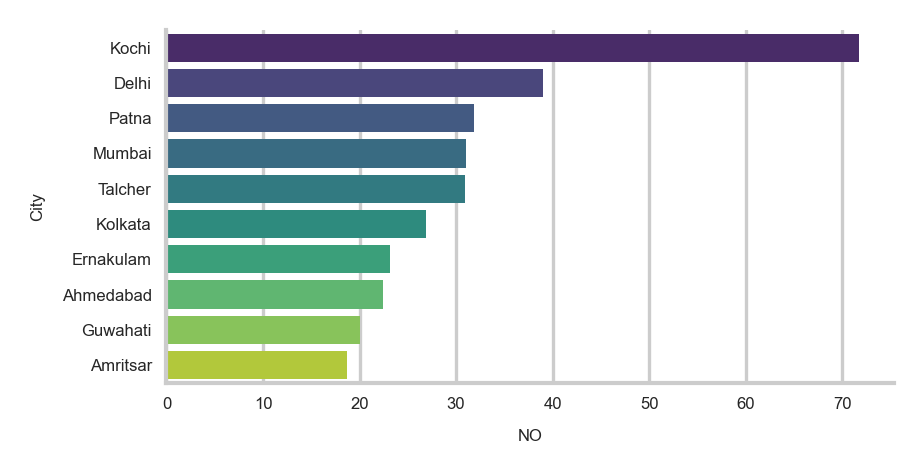

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['NO']].mean().sort_values(by='NO',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='NO',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='NO2', ylabel='City'>

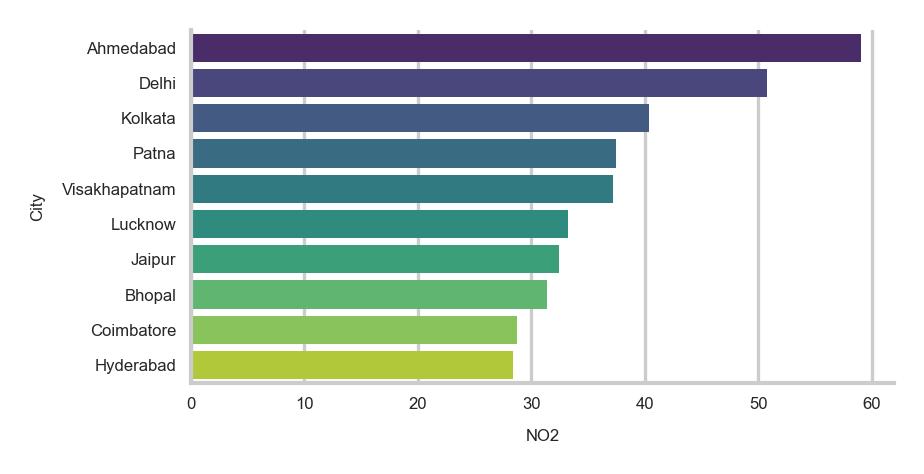

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['NO2']].mean().sort_values(by='NO2',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='NO2',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='NOx', ylabel='City'>

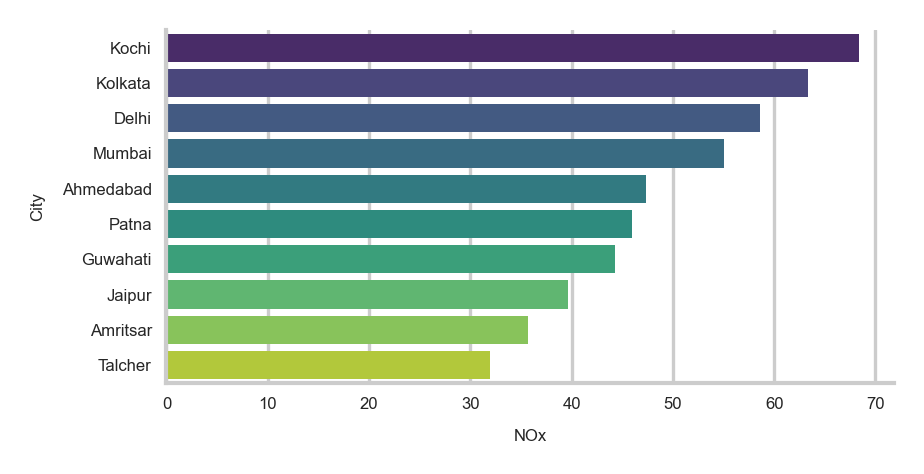

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['NOx']].mean().sort_values(by='NOx',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='NOx',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='NH3', ylabel='City'>

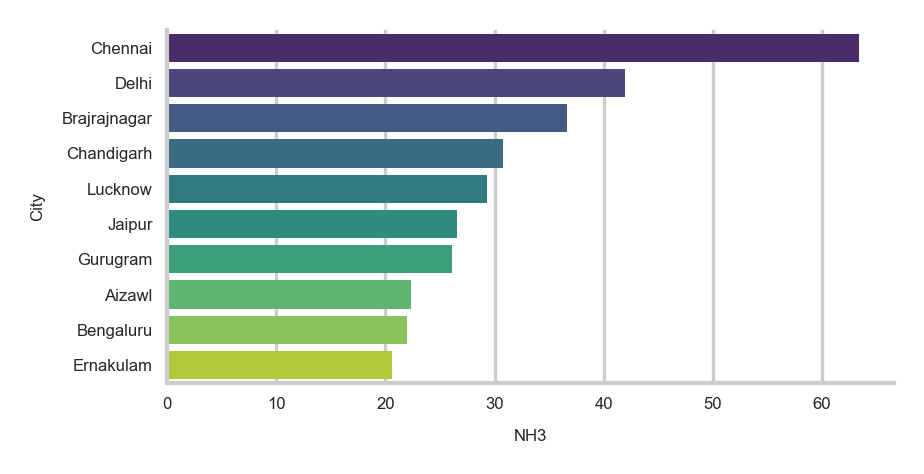

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['NH3']].mean().sort_values(by='NH3',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='NH3',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='CO', ylabel='City'>

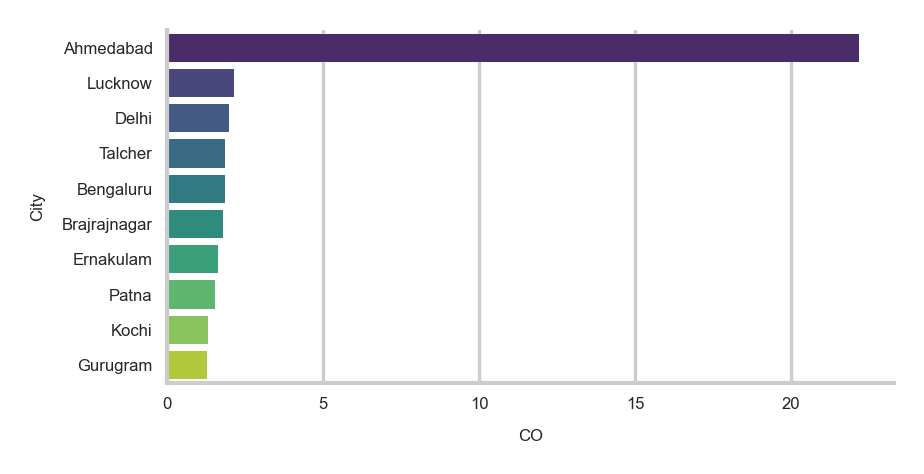

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['CO']].mean().sort_values(by='CO',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='CO',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='SO2', ylabel='City'>

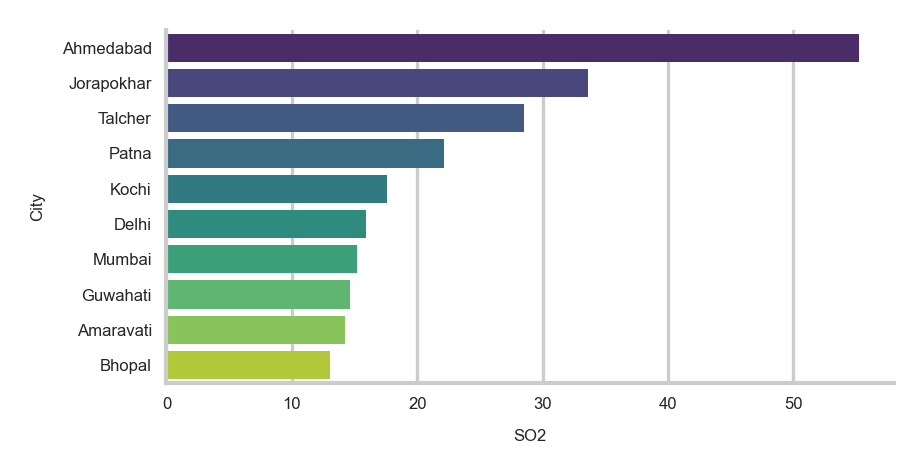

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['SO2']].mean().sort_values(by='SO2',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='SO2',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='O3', ylabel='City'>

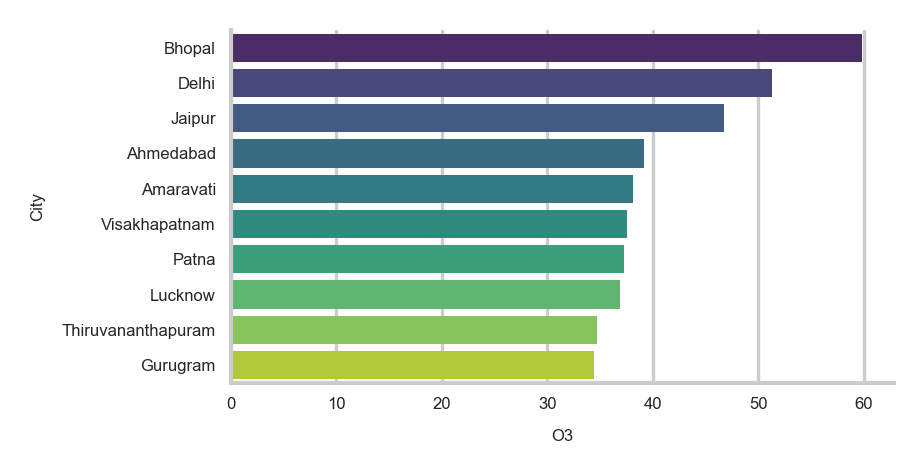

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['O3']].mean().sort_values(by='O3',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='O3',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='Benzene', ylabel='City'>

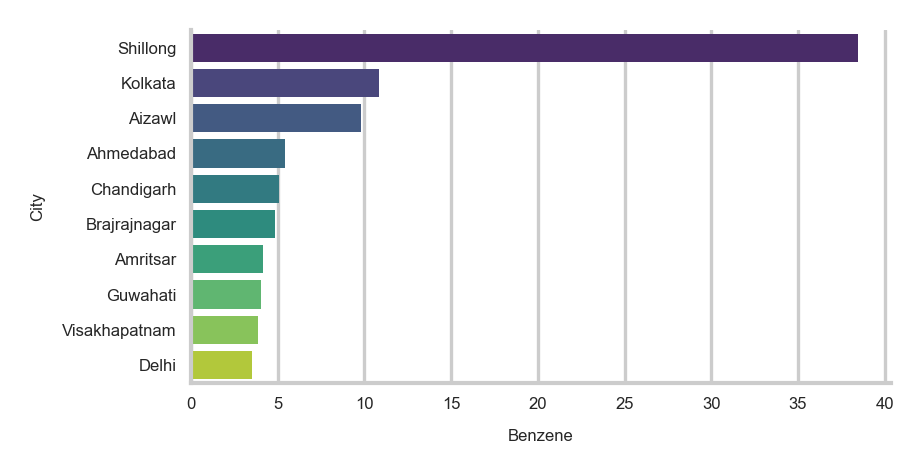

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['Benzene']].mean().sort_values(by='Benzene',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='Benzene',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='Toluene', ylabel='City'>

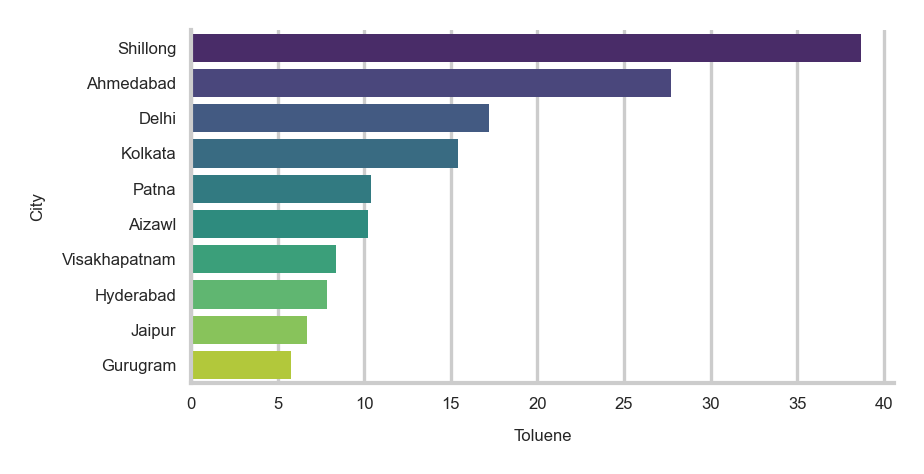

In [ ]:
x=pd.DataFrame(df.groupby(['City'])[['Toluene']].mean().sort_values(by='Toluene',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(3,1.5))
sns.barplot(data=x,x='Toluene',y='City',orient='h',palette='viridis')

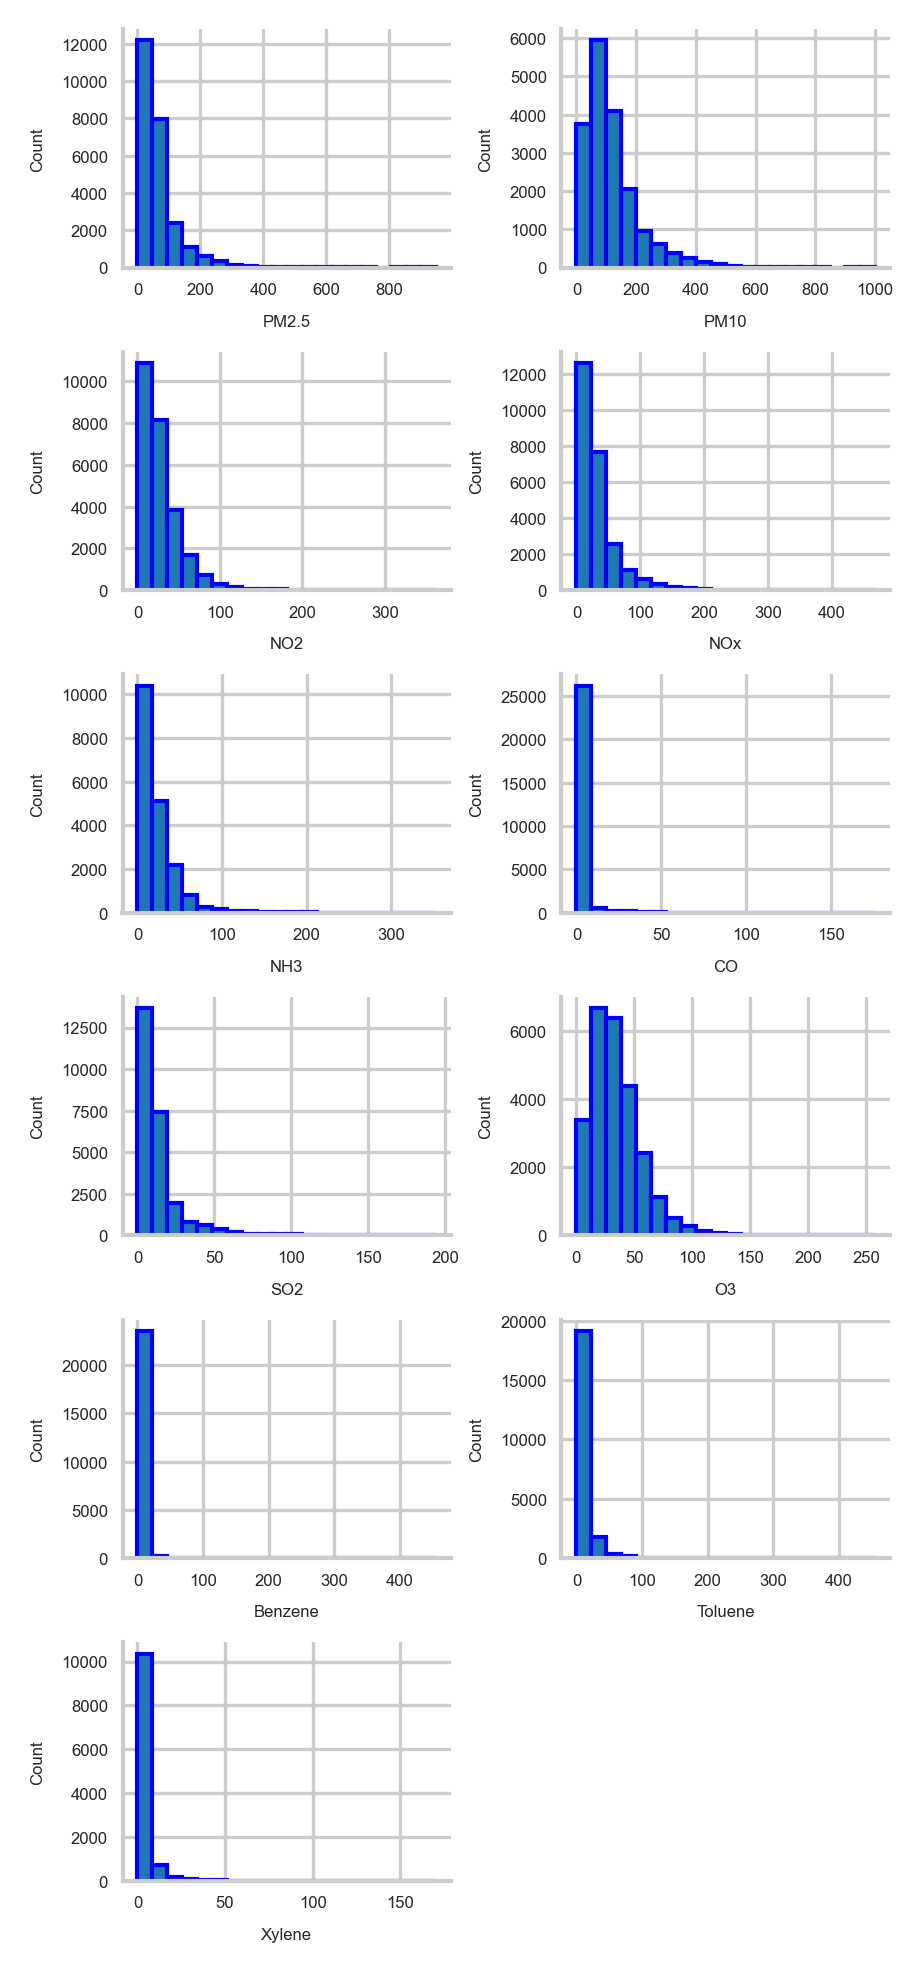

In [ ]:

cols=['PM2.5','PM10','NO2','NOx','NH3',
      'CO','SO2','O3','Benzene','Toluene','Xylene']

fig=plt.figure(figsize=(3,6.5))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(df[col].dropna(),bins=20,edgecolor='blue')
    plt.xlabel(col)
    plt.ylabel('Count')